# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("C:/Users/bhush/ML A-Z/AQuci.csv")

In [7]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,10-03-2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,11-03-2004,0:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,11-03-2004,1:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,11-03-2004,2:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,11-03-2004,3:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           29 non-null     object 
 1   Time           29 non-null     object 
 2   CO(GT)         29 non-null     float64
 3   PT08.S1(CO)    29 non-null     float64
 4   NMHC(GT)       29 non-null     float64
 5   C6H6(GT)       29 non-null     float64
 6   PT08.S2(NMHC)  29 non-null     float64
 7   NOx(GT)        29 non-null     float64
 8   PT08.S3(NOx)   29 non-null     float64
 9   NO2(GT)        29 non-null     float64
 10  PT08.S4(NO2)   29 non-null     float64
 11  PT08.S5(O3)    29 non-null     float64
 12  T              29 non-null     float64
 13  RH             29 non-null     float64
 14  AH             29 non-null     float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [9]:
# Firstly we need to look for the columns, which are similar, so that we could drop them.
X = df.iloc[:,4:5].values
X

array([[150],
       [112],
       [ 88],
       [ 80],
       [ 51],
       [ 38],
       [ 31],
       [ 31],
       [ 24],
       [ 19],
       [ 14],
       [  8],
       [ 16],
       [ 29],
       [ 64],
       [ 87],
       [ 77],
       [ 43],
       [ 61],
       [ 63],
       [164],
       [ 79],
       [ 95],
       [150],
       [307],
       [461],
       [401],
       [197],
       [ 61]], dtype=int64)

In [8]:
Y = df.iloc[:,6:7].values
Y

array([[1046],
       [ 955],
       [ 939],
       [ 948],
       [ 836],
       [ 750],
       [ 690],
       [ 672],
       [ 609],
       [ 561],
       [ 527],
       [ 512],
       [ 553],
       [ 667],
       [ 900],
       [ 960],
       [ 827],
       [ 762],
       [ 774],
       [ 869],
       [1034],
       [ 933],
       [ 912],
       [1020],
       [1319],
       [1488],
       [1404],
       [1076],
       [ 749]], dtype=int64)

In [10]:
# Shaping the models
X.shape,Y.shape

((29, 1), (29, 1))

In [14]:
# Thus to Train Test and Learn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=2,random_state=1)

In [15]:
X_train

array([[ 61],
       [164],
       [461],
       [ 63],
       [ 80],
       [ 14],
       [150],
       [ 95],
       [ 51],
       [ 88],
       [307],
       [ 31],
       [ 43],
       [ 29],
       [ 31],
       [401],
       [112],
       [ 77],
       [150],
       [ 87],
       [ 61],
       [197],
       [ 19],
       [ 24],
       [ 16],
       [  8],
       [ 38]], dtype=int64)

In [16]:
X_train.shape

(27, 1)

In [17]:
Y_test.shape

(2, 1)

In [20]:
# So now for building a Linear Regression Model
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [21]:
# We are done with the model building here and now we are supposed to test it.
predictions = regressor.predict(X_test)
predictions

array([[781.86354539],
       [813.04077027]])

In [22]:
Y_test

array([[900],
       [933]], dtype=int64)

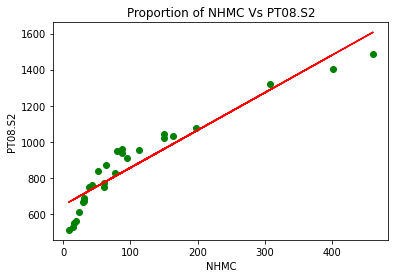

In [23]:
# thus we need to visualize it by using scatter plot model
plt.scatter(X_train,Y_train,color = 'g')
plt.plot(X_train,regressor.predict(X_train),color = 'r')
plt.title("Proportion of NHMC Vs PT08.S2")
plt.xlabel("NHMC")
plt.ylabel("PT08.S2")
plt.show()

# Multiple Regression

In [24]:
# Lets take 2 new X and Y data for Multiple Regression
# No Null Values was spotted in our database

In [27]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,10-03-2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,11-03-2004,0:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,11-03-2004,1:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,11-03-2004,2:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,11-03-2004,3:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [26]:
# To study the variations of our dataset 
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,-4.748276,1270.551724,103.482759,8.262069,872.137931,133.310345,1244.586207,93.000000,1536.862069,940.344828,10.348276,62.289655,0.777466
std,37.582468,186.087458,111.610490,6.482692,246.388445,110.952404,307.457026,66.169695,283.378813,331.410867,1.312201,7.861222,0.046294
min,-200.000000,965.000000,8.000000,1.100000,512.000000,-200.000000,702.000000,-200.000000,1182.000000,422.000000,8.000000,47.700000,0.690500
25%,1.200000,1144.000000,31.000000,3.600000,690.000000,89.000000,1079.000000,82.000000,1333.000000,730.000000,9.700000,58.100000,0.741900
50%,1.900000,1286.000000,64.000000,7.300000,869.000000,129.000000,1174.000000,101.000000,1517.000000,949.000000,10.500000,60.000000,0.764800
75%,2.200000,1360.000000,112.000000,9.500000,960.000000,184.000000,1453.000000,126.000000,1647.000000,1104.000000,11.000000,66.800000,0.806500
max,6.900000,1776.000000,461.000000,27.400000,1488.000000,383.000000,1918.000000,172.000000,2333.000000,1704.000000,13.600000,81.100000,0.877800


In [36]:
# Suppose CO and PT08.S1 are the 2 columns to be analyzed then check whether they both have the same data types
X = df.iloc[:,2:3].values
X

array([[   2.6],
       [   2. ],
       [   2.2],
       [   2.2],
       [   1.6],
       [   1.2],
       [   1.2],
       [   1. ],
       [   0.9],
       [   0.6],
       [-200. ],
       [   0.7],
       [   0.7],
       [   1.1],
       [   2. ],
       [   2.2],
       [   1.7],
       [   1.5],
       [   1.6],
       [   1.9],
       [   2.9],
       [   2.2],
       [   2.2],
       [   2.9],
       [   4.8],
       [   6.9],
       [   6.1],
       [   3.9],
       [   1.5]])

In [37]:
Y = df.iloc[:,3:4].values
Y

array([[1360],
       [1292],
       [1402],
       [1376],
       [1272],
       [1197],
       [1185],
       [1136],
       [1094],
       [1010],
       [1011],
       [1066],
       [1052],
       [1144],
       [1333],
       [1351],
       [1233],
       [1179],
       [1236],
       [1286],
       [1371],
       [1310],
       [1292],
       [1383],
       [1581],
       [1776],
       [1640],
       [1313],
       [ 965]], dtype=int64)

In [38]:
# Shape the data
X.shape,Y.shape

((29, 1), (29, 1))

In [40]:
X.dtype

dtype('float64')

In [41]:
Y.dtype

dtype('int64')

In [43]:
# Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [44]:
X_train.shape,Y_train.shape

((23, 1), (23, 1))

In [45]:
X_test.shape,Y_test.shape

((6, 1), (6, 1))

In [46]:
# Start building the model.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train,Y_train)
predictions = regressor.predict(X_test)
predictions

array([[1268.66058615],
       [1269.50709214],
       [1268.66058615],
       [1266.68540552],
       [1269.93034513],
       [1272.61094742]])

In [47]:
# From this we get to know about the predictions done of Y dataset accordingly
for i in range(len(predictions)):
    print(Y_test[i], "====>", predictions[i])

[1292] ====> [1268.66058615]
[1360] ====> [1269.50709214]
[1333] ====> [1268.66058615]
[1010] ====> [1266.68540552]
[1371] ====> [1269.93034513]
[1581] ====> [1272.61094742]


In [49]:
# From this we can find out mean squarred error.
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,predictions)

30679.922513229074

# Polynomial Regression

In [53]:
# In this we are going to use the same data of X and Y
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X,Y)

LinearRegression()

In [52]:
# Convert the data into Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
polyf = PolynomialFeatures(degree = 3)
X_poly = polyf.fit_transform(X)
X_poly

array([[ 1.00000e+00,  2.60000e+00,  6.76000e+00,  1.75760e+01],
       [ 1.00000e+00,  2.00000e+00,  4.00000e+00,  8.00000e+00],
       [ 1.00000e+00,  2.20000e+00,  4.84000e+00,  1.06480e+01],
       [ 1.00000e+00,  2.20000e+00,  4.84000e+00,  1.06480e+01],
       [ 1.00000e+00,  1.60000e+00,  2.56000e+00,  4.09600e+00],
       [ 1.00000e+00,  1.20000e+00,  1.44000e+00,  1.72800e+00],
       [ 1.00000e+00,  1.20000e+00,  1.44000e+00,  1.72800e+00],
       [ 1.00000e+00,  1.00000e+00,  1.00000e+00,  1.00000e+00],
       [ 1.00000e+00,  9.00000e-01,  8.10000e-01,  7.29000e-01],
       [ 1.00000e+00,  6.00000e-01,  3.60000e-01,  2.16000e-01],
       [ 1.00000e+00, -2.00000e+02,  4.00000e+04, -8.00000e+06],
       [ 1.00000e+00,  7.00000e-01,  4.90000e-01,  3.43000e-01],
       [ 1.00000e+00,  7.00000e-01,  4.90000e-01,  3.43000e-01],
       [ 1.00000e+00,  1.10000e+00,  1.21000e+00,  1.33100e+00],
       [ 1.00000e+00,  2.00000e+00,  4.00000e+00,  8.00000e+00],
       [ 1.00000e+00,  2.

In [54]:
# Here we need to do the Regression more than 1 time as its Polynomial
regressor2 = LinearRegression()
regressor2.fit(X_poly,Y)

LinearRegression()

In [55]:
X

array([[   2.6],
       [   2. ],
       [   2.2],
       [   2.2],
       [   1.6],
       [   1.2],
       [   1.2],
       [   1. ],
       [   0.9],
       [   0.6],
       [-200. ],
       [   0.7],
       [   0.7],
       [   1.1],
       [   2. ],
       [   2.2],
       [   1.7],
       [   1.5],
       [   1.6],
       [   1.9],
       [   2.9],
       [   2.2],
       [   2.2],
       [   2.9],
       [   4.8],
       [   6.9],
       [   6.1],
       [   3.9],
       [   1.5]])

In [56]:
Y

array([[1360],
       [1292],
       [1402],
       [1376],
       [1272],
       [1197],
       [1185],
       [1136],
       [1094],
       [1010],
       [1011],
       [1066],
       [1052],
       [1144],
       [1333],
       [1351],
       [1233],
       [1179],
       [1236],
       [1286],
       [1371],
       [1310],
       [1292],
       [1383],
       [1581],
       [1776],
       [1640],
       [1313],
       [ 965]], dtype=int64)

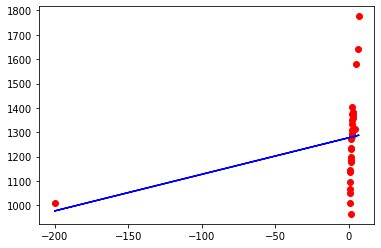

In [57]:
#Visualizing the model
plt.scatter(X,Y,color="r")
plt.plot(X,regressor1.predict(X),color="b")

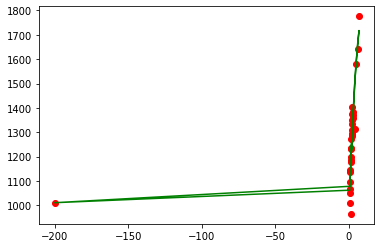

In [58]:
# Now Lets try this with Polynomial Regression
plt.scatter(X,Y,color="r")
plt.plot(X,regressor2.predict(X_poly),color="g")

In [59]:
# To know the difference between both the regressors
prediction1 = regressor1.predict([[10]])
prediction1

array([[1292.70226105]])

In [61]:
test_data = polyf.fit_transform([[10]])
prediction2 = regressor2.predict(test_data)
prediction2

array([[1763.64958713]])

# Support Vector Regression

In [62]:
# We need to do the Standard Scalling method to get Y in the range of -1 to 1 
Y

array([[1360],
       [1292],
       [1402],
       [1376],
       [1272],
       [1197],
       [1185],
       [1136],
       [1094],
       [1010],
       [1011],
       [1066],
       [1052],
       [1144],
       [1333],
       [1351],
       [1233],
       [1179],
       [1236],
       [1286],
       [1371],
       [1310],
       [1292],
       [1383],
       [1581],
       [1776],
       [1640],
       [1313],
       [ 965]], dtype=int64)

In [63]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_scaled = sc1.fit_transform(X)
X_scaled

array([[ 0.19898491],
       [ 0.18273743],
       [ 0.18815326],
       [ 0.18815326],
       [ 0.17190578],
       [ 0.16107413],
       [ 0.16107413],
       [ 0.1556583 ],
       [ 0.15295039],
       [ 0.14482665],
       [-5.28724663],
       [ 0.14753456],
       [ 0.14753456],
       [ 0.15836622],
       [ 0.18273743],
       [ 0.18815326],
       [ 0.17461369],
       [ 0.16919787],
       [ 0.17190578],
       [ 0.18002952],
       [ 0.20710865],
       [ 0.18815326],
       [ 0.18815326],
       [ 0.20710865],
       [ 0.25855899],
       [ 0.31542516],
       [ 0.29376186],
       [ 0.23418778],
       [ 0.16919787]])

In [65]:
sc2 = StandardScaler()
Y_scaled = sc2.fit_transform(Y.reshape(-1,1))
Y_scaled

array([[ 0.48918694],
       [ 0.11729926],
       [ 0.71888227],
       [ 0.57668992],
       [ 0.00792053],
       [-0.40224971],
       [-0.46787695],
       [-0.73585484],
       [-0.96555017],
       [-1.42494083],
       [-1.4194719 ],
       [-1.11868039],
       [-1.1952455 ],
       [-0.69210334],
       [ 0.34152566],
       [ 0.43996651],
       [-0.20536799],
       [-0.50069057],
       [-0.18896119],
       [ 0.08448564],
       [ 0.54934524],
       [ 0.21574012],
       [ 0.11729926],
       [ 0.61497248],
       [ 1.69782191],
       [ 2.76426453],
       [ 2.02048916],
       [ 0.23214693],
       [-1.67104298]])

In [66]:
# When the data is not linearly seperable we use SVR i.e Support Vector Machine
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(X_scaled,Y_scaled)

SVR()

In [67]:
test_data = sc1.transform([[8]])
prediction = svr.predict(test_data)
sc2.inverse_transform([prediction])

array([[1313.27348508]])

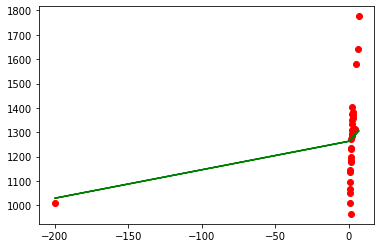

In [68]:
plt.scatter(X,Y,color="r")
plt.plot(X,sc2.inverse_transform(svr.predict(X_scaled).reshape(-1,1)),color="g")